In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.chdir(r"C:\Users\Anupriya Bharti\Desktop\data projects\Churn Analysis")

df=pd.read_csv("Customer Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#  Replacing Blank with 0 as tenure is 0 and no total charges are recorded

In [3]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [96]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#Replacing the coulmn name

In [4]:
df.rename(columns = {"customerID" : "CustomerID","gender":"Gender","tenure":"Tenure"}, inplace=True)

In [5]:
df.duplicated().sum()

0

In [28]:
df["CustomerID"].duplicated().sum()

0

In [ ]:
df.describe()

In [ ]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

#Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [100]:
df

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,no,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,no,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,no,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


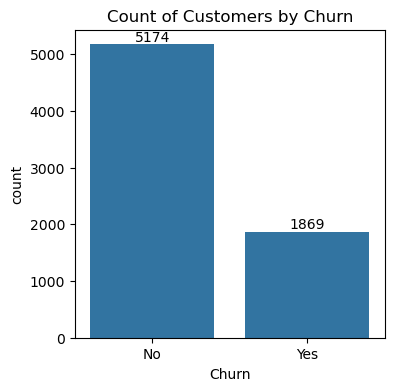

In [7]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='Churn', data=df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
#plt.figure(figsize=(1,1))
plt.show()

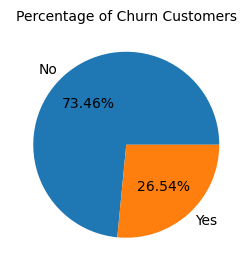

In [8]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of Churn Customers", fontsize= 10)
plt.show()

#From the given pie chart 26.54% of our customers have churned out.

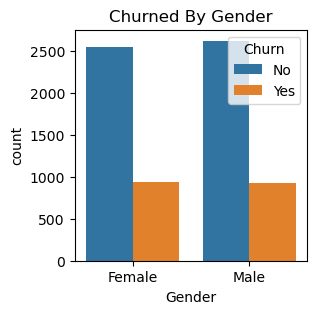

In [103]:
plt.figure(figsize=(3,3))
sns.countplot(x="Gender" , data = df, hue="Churn")
plt.title("Churned By Gender")
plt.show()

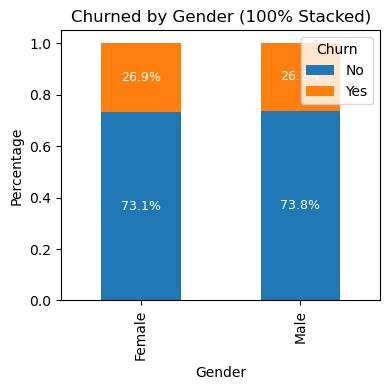

In [124]:

# Step 1: Calculate counts
counts = pd.crosstab(df['Gender'], df['Churn'])

# Step 2: Convert to percentages (row-wise)
percentages = counts.div(counts.sum(axis=1), axis=0)

# Step 3: Plot stacked bar chart
ax = percentages.plot(kind='bar', stacked=True, figsize=(4, 4), color=['#1f77b4', '#ff7f0e'])

# Step 4: Annotate each segment with its percentage
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.annotate(f'{height * 100:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                    ha='center', va='center',
                    color='white', fontsize=9)

# Step 5: Final styling
plt.title('Churned by Gender (100% Stacked)')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

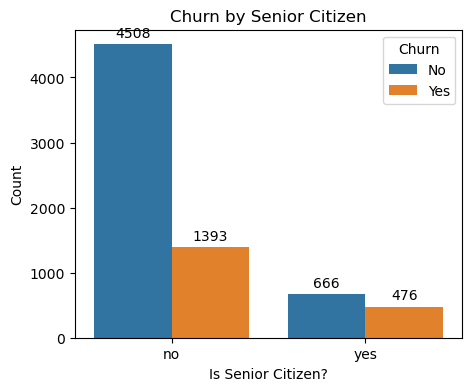

In [116]:

plt.figure(figsize=(5,4))
ax = sns.countplot(x='SeniorCitizen', hue='Churn', data=df)

# Loop over all BarContainers (one per hue level)
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.title('Churn by Senior Citizen')
plt.xlabel('Is Senior Citizen?')
plt.ylabel('Count')
plt.show()

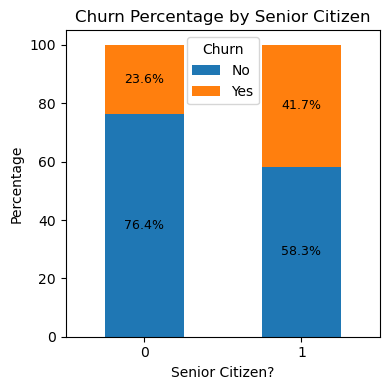

In [9]:
total_counts= df.groupby('SeniorCitizen')["Churn"].value_counts(normalize= True).unstack() * 100

#plot
fig, ax = plt.subplots(figsize=(4,4))

#plot the bars
total_counts.plot(kind = "bar", stacked = True, ax=ax)

#Adding percencatge labels on the bars
for p in ax.patches:
    width,height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height/2, f'{height:.1f}%', ha= 'center', va='center')

plt.title("Churn by Senior Citizen")
plt.xlabel("Senior Citizen")
plt.ylabel('Percentage')
plt.xticks(rotation = 0)
plt.legend(title="Churn", loc='upper center')
plt.show()

#Nearly 41.7% of people in senior citizen category has churned out,

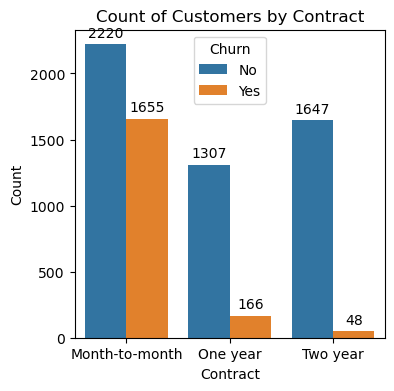

In [17]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Contract', hue='Churn', data=df)

# Loop over all BarContainers (one per hue level)
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.title('Count of Customers by Contract')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

#People with mmonth -to -month contract are likely to churn than those who have 1 or 2 years of contract

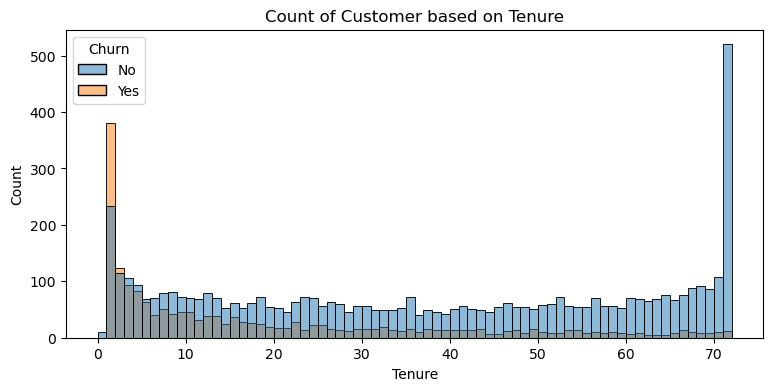

In [24]:
plt.figure(figsize=(9,4))
sns.histplot(x='Tenure', hue='Churn', data=df, bins=72)
plt.title('Count of Customer based on Tenure')
plt.show()

#People who have  used our services for long time have stayed and people who has used our services for 1 or 2 months have churned

In [26]:
df.columns.values

array(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

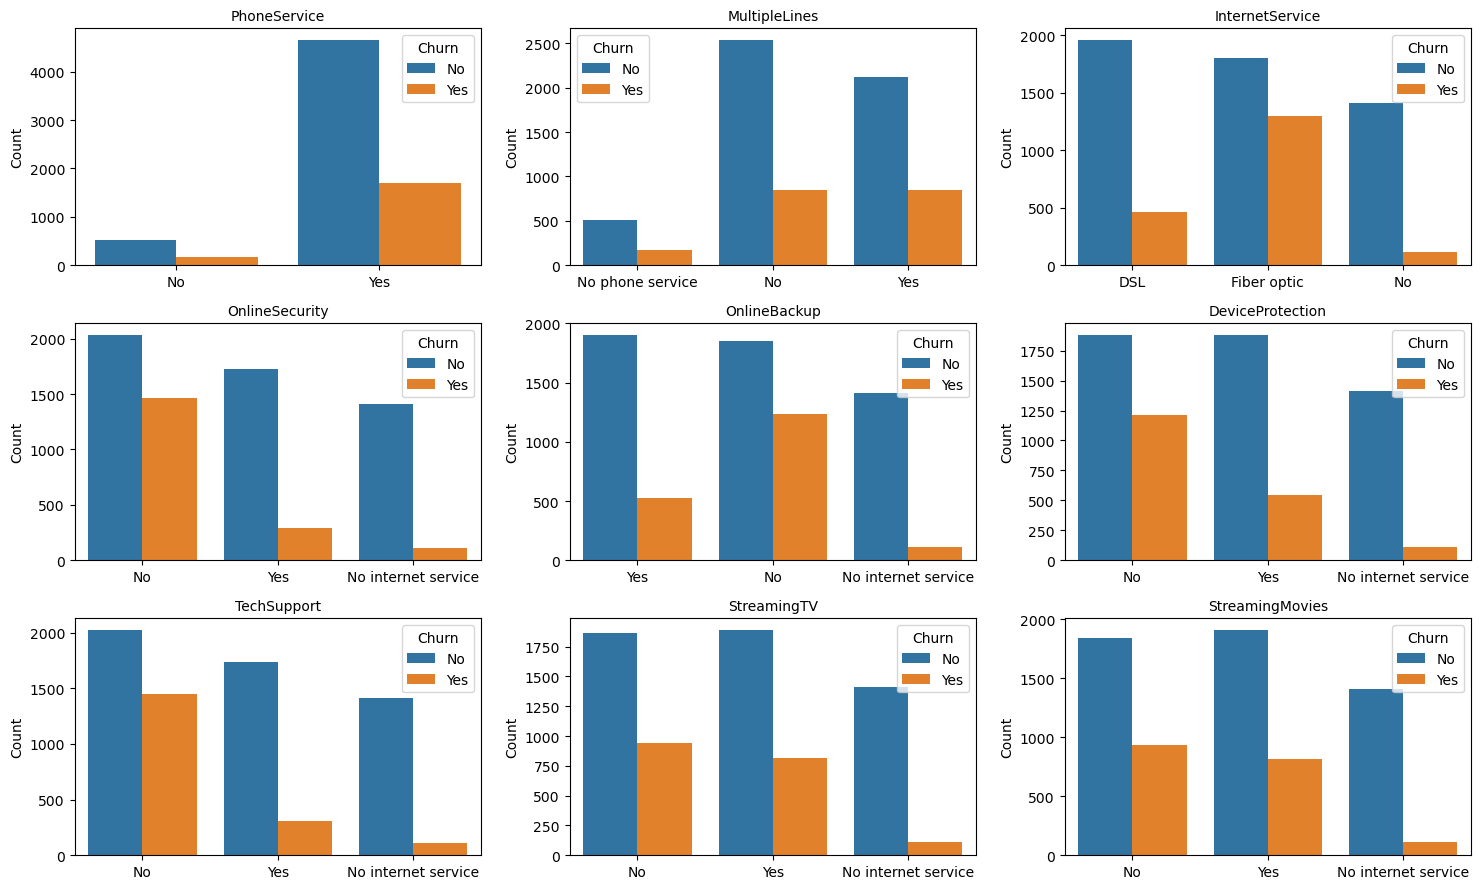

In [39]:
# Selected columns
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Determine subplot grid size
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols  # auto-calculates rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

# Loop through columns and plot
for i, col in enumerate(cols):
    ax = axes[i]
    sns.countplot(data=df, x=col, ax=ax, hue= 'Churn')
    ax.set_title(f'{col}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
   

# Remove any unused subplot boxes
for j in range(len(cols), len(axes)):
     fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

 #Customers without additional services (OnlineSecurity, Backup, DeviceProtection, TechSupport) churn at higher rates.
 #Fiber optic internet users churn more than DSL users.
 #Engagement services like StreamingTV and StreamingMovies correlate with reduced churn.
 #Basic services like PhoneService and MultipleLines have mixed signals, but add‑ons clearly help retention.

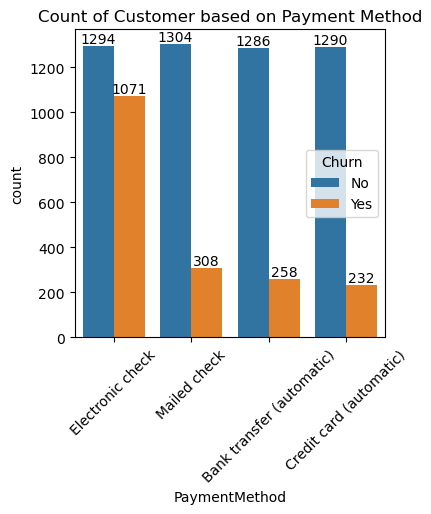

In [44]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='PaymentMethod', hue='Churn', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of Customer based on Payment Method')
plt.xticks(rotation = 45)
plt.show()

#Customer is likely to churn when they are using Electronic Check